In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
pd.options.display.max_columns = None

In [121]:
!tree ../data/raw

../data/raw
├── Random_Submission_format.csv
├── testinputs.csv
├── traininginputs.csv
└── trainingoutput.csv

0 directories, 4 files


In [122]:
# upload data

raw_path = '../data/raw/'

X = pd.read_csv(raw_path+'traininginputs.csv')
y = pd.read_csv(raw_path+'trainingoutput.csv')

In [125]:
# join X & y
df = X.merge(y, on='PROC_TRACEINFO')
df

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,I-B-XA1207672-190520-00031,158.2,168.40,180.6,110.65,11.88,12.23,NaN,11.98,6.61,24.03,14.8,98.76,6.61,0
34511,I-B-XA1207672-190906-00270,139.4,146.24,154.5,108.14,12.04,12.27,0.41,11.97,6.41,21.52,15.5,98.37,6.40,0
34512,I-B-XA1207672-190429-00930,165.5,157.34,149.8,112.77,12.09,12.17,NaN,11.97,6.62,22.65,24.4,92.92,6.62,0
34513,I-B-XA1207672-190424-02120,152.4,165.07,140.0,111.19,12.06,12.34,NaN,11.97,6.60,20.77,13.6,101.21,6.60,0


In [126]:
# dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [127]:
# missing values
df.isna().sum()

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
Binar OP130_Resultat_Global_v          0
dtype: int64

In [130]:
df.dtypes

PROC_TRACEINFO                      object
OP070_V_1_angle_value              float64
OP090_SnapRingPeakForce_value      float64
OP070_V_2_angle_value              float64
OP120_Rodage_I_mesure_value        float64
OP090_SnapRingFinalStroke_value    float64
OP110_Vissage_M8_torque_value      float64
OP100_Capuchon_insertion_mesure    float64
OP120_Rodage_U_mesure_value        float64
OP070_V_1_torque_value             float64
OP090_StartLinePeakForce_value     float64
OP110_Vissage_M8_angle_value       float64
OP090_SnapRingMidPointForce_val    float64
OP070_V_2_torque_value             float64
Binar OP130_Resultat_Global_v        int64
dtype: object

In [131]:
# % of missing values
df['OP100_Capuchon_insertion_mesure'].isna().sum()/df.shape[0] * 100

53.96784006953499

In [132]:
# imbalance target
df['Binar OP130_Resultat_Global_v'].value_counts()

0    34210
1      305
Name: Binar OP130_Resultat_Global_v, dtype: int64

In [133]:
# class 1 (defect) is less 1% 
df['Binar OP130_Resultat_Global_v'].value_counts()[1] / df['Binar OP130_Resultat_Global_v'].count() * 100

0.8836737650296972

In [134]:
# infos extraction of 1st columns

# get references
df['reference'] = [i.split('-')[2] for i in df.iloc[:,0]]

# get date & convert to datetime format
df['date'] = [i.split('-')[3] for i in df.iloc[:,0]]
df['date'] = pd.to_datetime(['20' + i[0:2] + '-' + i[2:4] + '-' + i[4:] for i in df['date']])

# get product_code 
df['product_code'] = [i.split('-')[4] for i in df.iloc[:,0]]

df.reference.value_counts()
# all reference are identical 
# unnescessary to keep ?

XA1207672    34515
Name: reference, dtype: int64

In [135]:
# extract year month and day
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v,reference,date,product_code,year,month,day
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0,XA1207672,2019-04-29,00688,2019,4,29
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0,XA1207672,2019-08-28,00973,2019,8,28
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0,XA1207672,2019-07-12,03462,2019,7,12
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0,XA1207672,2019-08-03,00051,2019,8,3
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0,XA1207672,2019-05-08,03248,2019,5,8


In [136]:
df.columns

Index(['PROC_TRACEINFO', 'OP070_V_1_angle_value',
       'OP090_SnapRingPeakForce_value', 'OP070_V_2_angle_value',
       'OP120_Rodage_I_mesure_value', 'OP090_SnapRingFinalStroke_value',
       'OP110_Vissage_M8_torque_value', 'OP100_Capuchon_insertion_mesure',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'Binar OP130_Resultat_Global_v', 'reference', 'date', 'product_code',
       'year', 'month', 'day'],
      dtype='object')

In [137]:
cols_to_order = ['PROC_TRACEINFO', 'reference', 'date', 'product_code',
                 'OP070_V_1_angle_value','OP090_SnapRingPeakForce_value', 'OP070_V_2_angle_value',
                 'OP120_Rodage_I_mesure_value', 'OP090_SnapRingFinalStroke_value','OP110_Vissage_M8_torque_value', 
                 'OP100_Capuchon_insertion_mesure','OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
                 'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value','OP090_SnapRingMidPointForce_val', 
                 'OP070_V_2_torque_value','Binar OP130_Resultat_Global_v']

df_final = df[cols_to_order]

In [138]:
df

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v,reference,date,product_code,year,month,day
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0,XA1207672,2019-04-29,00688,2019,4,29
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0,XA1207672,2019-08-28,00973,2019,8,28
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0,XA1207672,2019-07-12,03462,2019,7,12
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0,XA1207672,2019-08-03,00051,2019,8,3
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0,XA1207672,2019-05-08,03248,2019,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,I-B-XA1207672-190520-00031,158.2,168.40,180.6,110.65,11.88,12.23,NaN,11.98,6.61,24.03,14.8,98.76,6.61,0,XA1207672,2019-05-20,00031,2019,5,20
34511,I-B-XA1207672-190906-00270,139.4,146.24,154.5,108.14,12.04,12.27,0.41,11.97,6.41,21.52,15.5,98.37,6.40,0,XA1207672,2019-09-06,00270,2019,9,6
34512,I-B-XA1207672-190429-00930,165.5,157.34,149.8,112.77,12.09,12.17,NaN,11.97,6.62,22.65,24.4,92.92,6.62,0,XA1207672,2019-04-29,00930,2019,4,29
34513,I-B-XA1207672-190424-02120,152.4,165.07,140.0,111.19,12.06,12.34,NaN,11.97,6.60,20.77,13.6,101.21,6.60,0,XA1207672,2019-04-24,02120,2019,4,24


In [139]:
# sort by date and product_code
df_final_bis = df_final.sort_values(['date','product_code']).reset_index().drop('index', axis=1)
df_final_bis

,PROC_TRACEINFO,reference,date,product_code,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190420-01120,XA1207672,2019-04-20,01120,141.1,171.27,154.0,114.75,12.09,12.15,NaN,11.97,6.65,24.70,38.3,106.41,6.61,0
1,I-B-XA1207672-190420-01123,XA1207672,2019-04-20,01123,165.1,176.88,149.1,118.21,12.08,12.25,NaN,11.97,6.60,25.83,16.9,97.73,6.61,0
2,I-B-XA1207672-190420-01124,XA1207672,2019-04-20,01124,186.6,169.28,133.1,121.10,12.10,12.12,NaN,11.97,6.61,24.48,25.0,101.98,6.61,0
3,I-B-XA1207672-190420-01125,XA1207672,2019-04-20,01125,153.1,175.58,176.7,114.19,12.08,12.21,NaN,11.97,6.60,25.13,16.3,96.26,6.61,0
4,I-B-XA1207672-190420-01126,XA1207672,2019-04-20,01126,147.6,167.72,131.6,116.65,12.09,12.17,NaN,11.97,6.63,21.41,35.3,92.31,6.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,I-B-XA1207672-190907-02773,XA1207672,2019-09-07,02773,147.4,159.95,160.1,107.80,12.05,12.19,0.41,11.97,6.42,22.77,17.6,100.31,6.41,0
34511,I-B-XA1207672-190907-02774,XA1207672,2019-09-07,02774,175.0,153.79,162.9,114.38,12.06,12.18,0.41,11.97,6.41,25.05,20.4,102.30,6.40,0
34512,I-B-XA1207672-190907-02777,XA1207672,2019-09-07,02777,166.5,151.48,178.8,117.01,12.06,12.24,0.41,11.97,6.41,22.72,18.1,99.83,6.41,0
34513,I-B-XA1207672-190907-02779,XA1207672,2019-09-07,02779,184.6,150.72,149.1,113.37,12.06,12.29,0.41,11.97,6.42,21.54,12.1,94.14,6.42,0


In [118]:
df_final_bis.date_complet.iloc[0] , df_final_bis.date_complet.iloc[-1] # start date & end date

('2019-04-20', '2019-09-07')

In [140]:
df_final_bis.dtypes

PROC_TRACEINFO                             object
reference                                  object
date                               datetime64[ns]
product_code                               object
OP070_V_1_angle_value                     float64
OP090_SnapRingPeakForce_value             float64
OP070_V_2_angle_value                     float64
OP120_Rodage_I_mesure_value               float64
OP090_SnapRingFinalStroke_value           float64
OP110_Vissage_M8_torque_value             float64
OP100_Capuchon_insertion_mesure           float64
OP120_Rodage_U_mesure_value               float64
OP070_V_1_torque_value                    float64
OP090_StartLinePeakForce_value            float64
OP110_Vissage_M8_angle_value              float64
OP090_SnapRingMidPointForce_val           float64
OP070_V_2_torque_value                    float64
Binar OP130_Resultat_Global_v               int64
dtype: object

In [170]:
# columns
# understanding who measure what from what op
# rename columns
cols = list(X.columns)
sensor = [col[6:] for col in cols[1:]]
op = [col[:5] for col in cols[1:]]
op_sensor = pd.DataFrame({'op':op, 'sensor':sensor}).sort_values('op')
op_sensor

# list(op_sensor['sensor'])

,op,sensor
0,OP070,V_1_angle_value
2,OP070,V_2_angle_value
8,OP070,V_1_torque_value
12,OP070,V_2_torque_value
1,OP090,SnapRingPeakForce_value
4,OP090,SnapRingFinalStroke_value
9,OP090,StartLinePeakForce_value
11,OP090,SnapRingMidPointForce_val
6,OP100,Capuchon_insertion_mesure
5,OP110,Vissage_M8_torque_value


In [174]:
# create columns dictionary to rename columns
new_names = list(op_sensor.sort_index()['sensor'])
old_names = list(df_final_bis.columns[4:-1])
cols_dict = dict(zip(old_names,new_names))

# update dict change target columns name
cols_dict.update({'Binar OP130_Resultat_Global_v' : 'Results_Global_v'})

# rename
df_final_bis.rename(columns=cols_dict, inplace=True)

In [178]:
df_final_bis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PROC_TRACEINFO             34515 non-null  object        
 1   reference                  34515 non-null  object        
 2   date                       34515 non-null  datetime64[ns]
 3   product_code               34515 non-null  object        
 4   V_1_angle_value            34515 non-null  float64       
 5   SnapRingPeakForce_value    34515 non-null  float64       
 6   V_2_angle_value            34515 non-null  float64       
 7   Rodage_I_mesure_value      34515 non-null  float64       
 8   SnapRingFinalStroke_value  34515 non-null  float64       
 9   Vissage_M8_torque_value    34515 non-null  float64       
 10  Capuchon_insertion_mesure  15888 non-null  float64       
 11  Rodage_U_mesure_value      34515 non-null  float64       
 12  V_1_

In [180]:
df_processed = df_final_bis.copy()

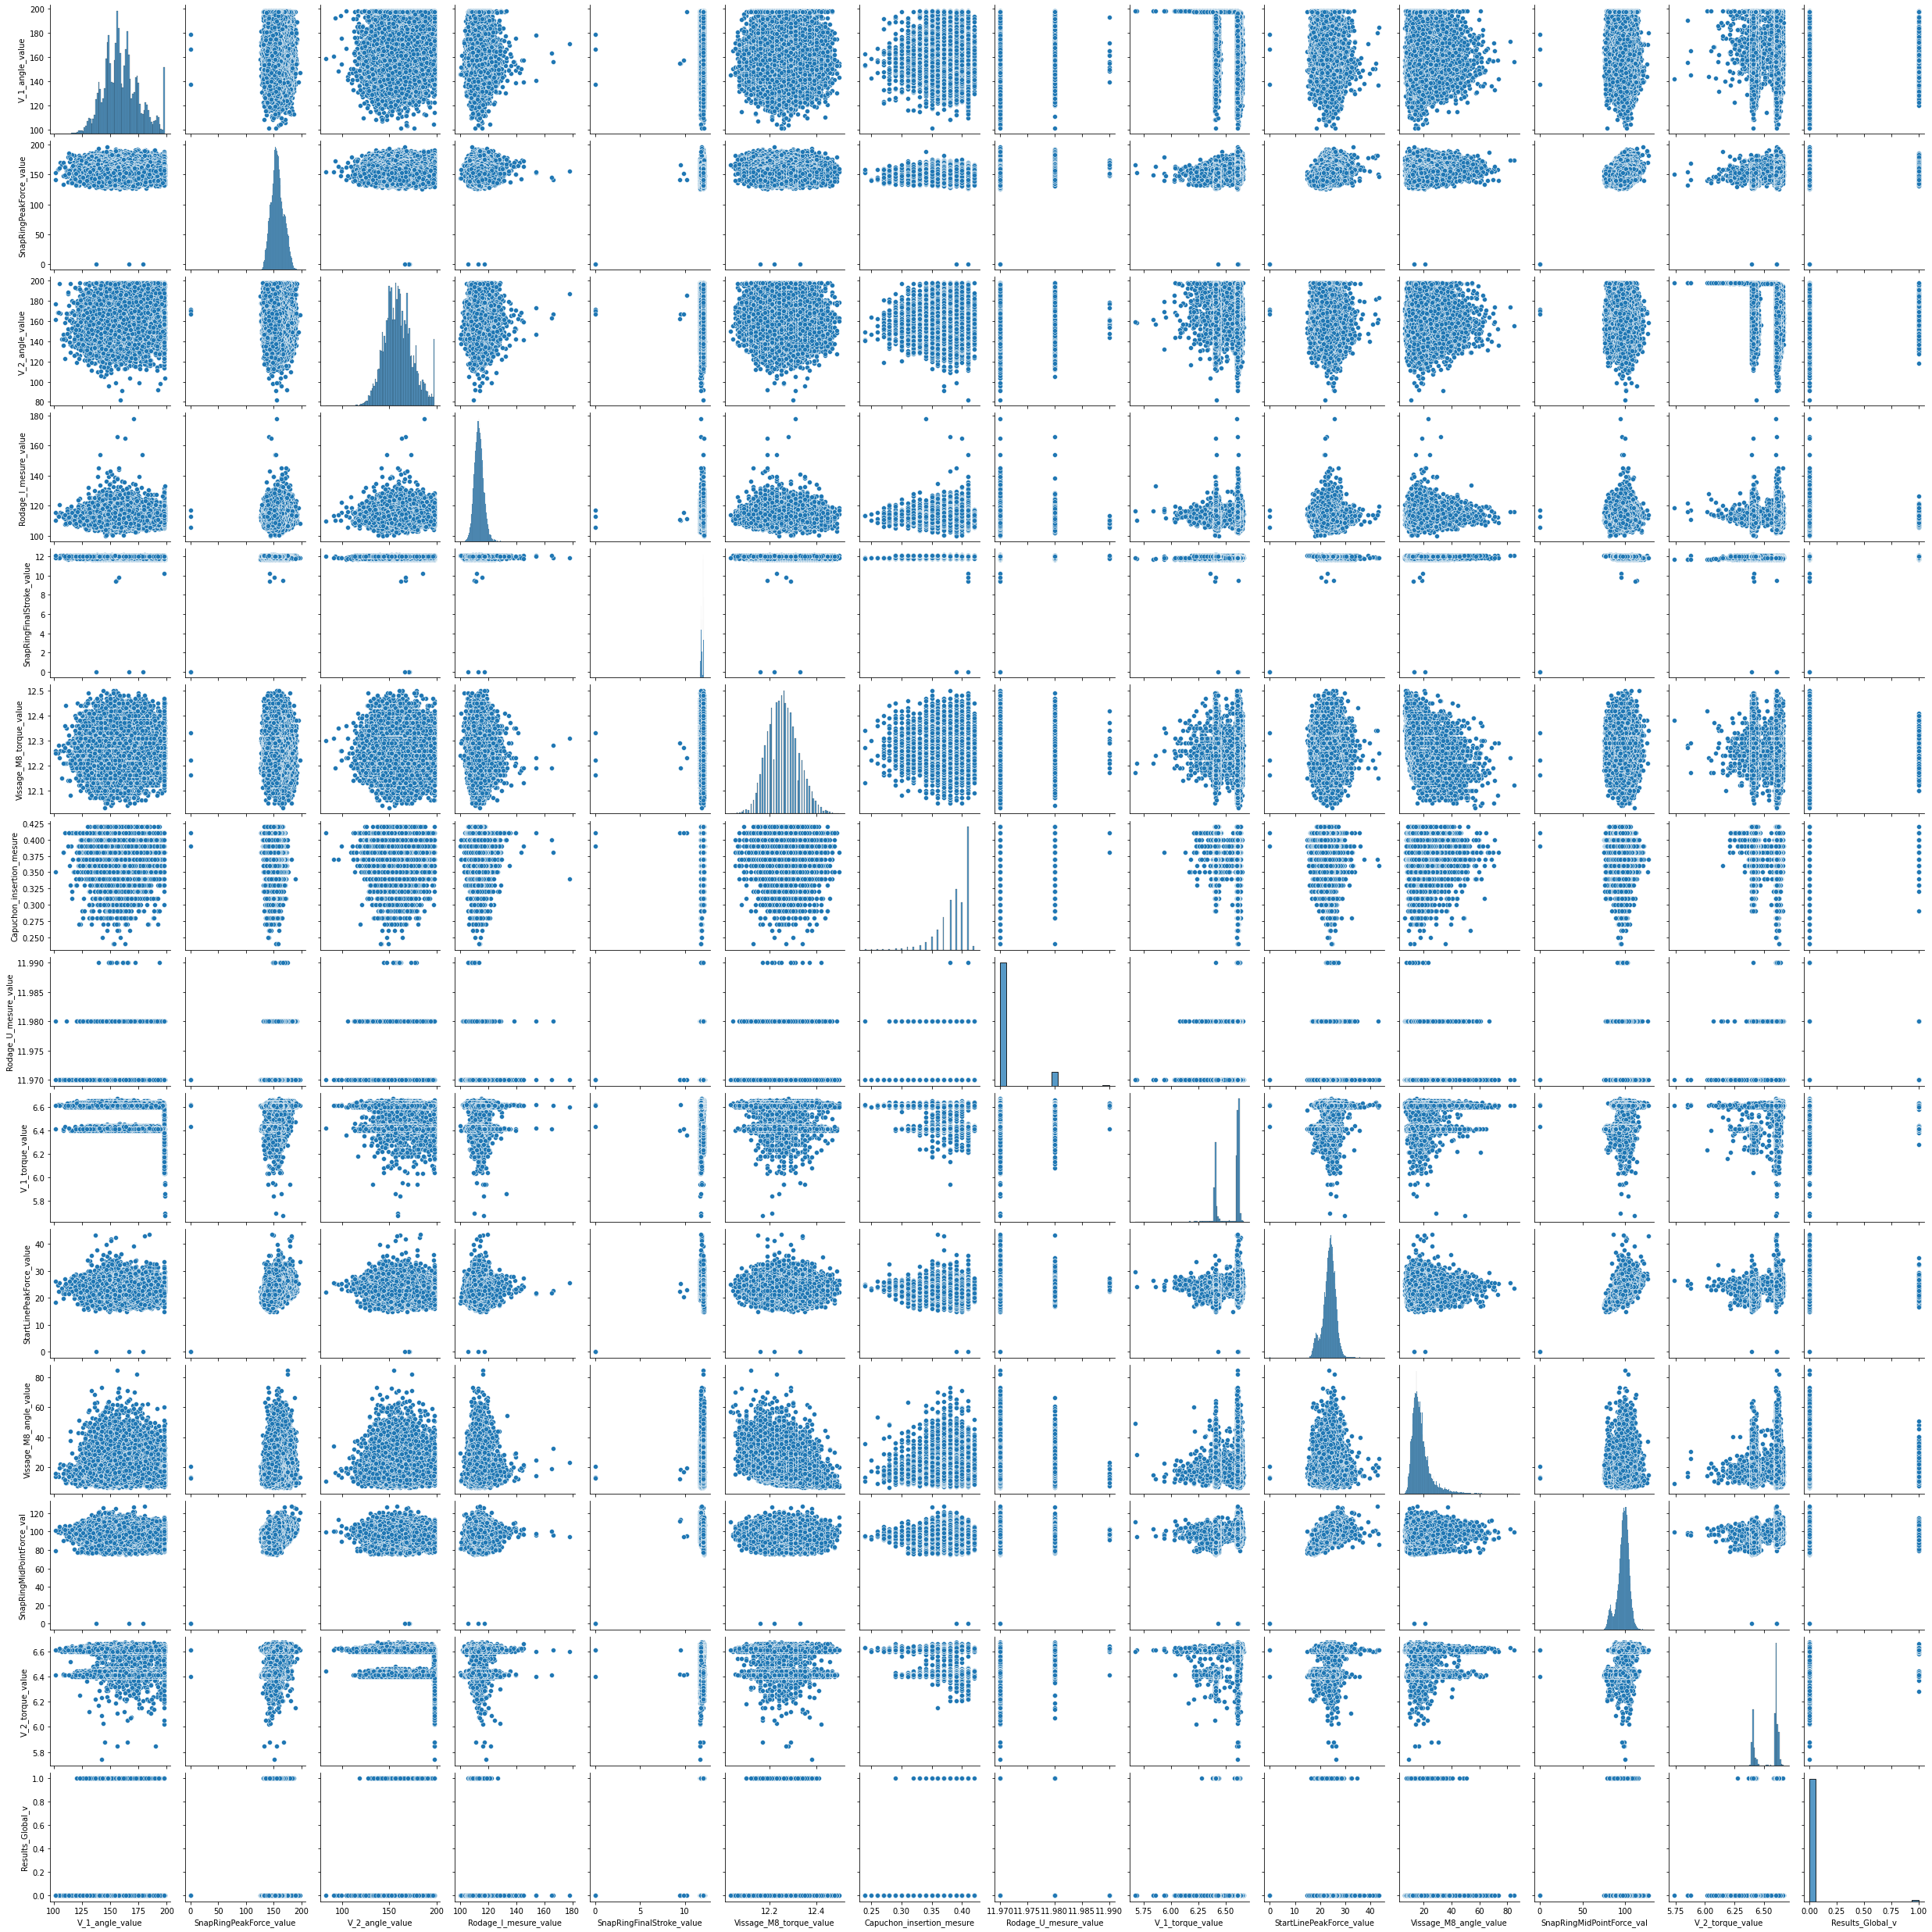

In [188]:
sns.pairplot(data=df_processed)

<AxesSubplot:xlabel='date', ylabel='Results_Global_v'>

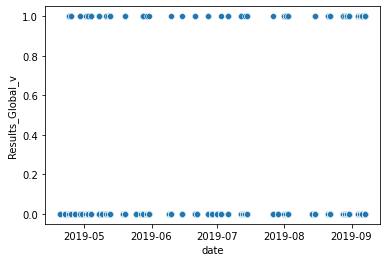

In [206]:
sns.scatterplot(data=df_processed, x='date', y='Results_Global_v')

<AxesSubplot:xlabel='Results_Global_v', ylabel='Capuchon_insertion_mesure'>

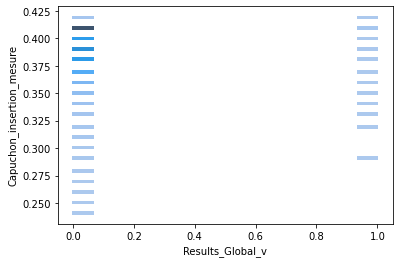

In [220]:
sns.histplot(data=df_processed, y='Capuchon_insertion_mesure', x='Results_Global_v')

In [200]:
df_processed['reference'].value_counts()

XA1207672    34515
Name: reference, dtype: int64

In [207]:
# save processed datasets
path_to_precessed = '../data/processed/'

# drop extracted columns and reference because of identical value
df_processed.drop(['PROC_TRACEINFO', 'reference'], axis=1, inplace=True)

# save
# df_processed.to_csv(path_to_precessed+'valeo_processed.csv', index=False)

In [222]:
!head -n 100 ../data/processed/valeo_processed.csv

date,product_code,V_1_angle_value,SnapRingPeakForce_value,V_2_angle_value,Rodage_I_mesure_value,SnapRingFinalStroke_value,Vissage_M8_torque_value,Capuchon_insertion_mesure,Rodage_U_mesure_value,V_1_torque_value,StartLinePeakForce_value,Vissage_M8_angle_value,SnapRingMidPointForce_val,V_2_torque_value,Results_Global_v
2019-04-20,01120,141.1,171.27,154.0,114.75,12.09,12.15,,11.97,6.65,24.7,38.3,106.41,6.61,0
2019-04-20,01123,165.1,176.88,149.1,118.21,12.08,12.25,,11.97,6.6,25.83,16.9,97.73,6.61,0
2019-04-20,01124,186.6,169.28,133.1,121.1,12.1,12.12,,11.97,6.61,24.48,25.0,101.98,6.61,0
2019-04-20,01125,153.1,175.58,176.7,114.19,12.08,12.21,,11.97,6.6,25.13,16.3,96.26,6.61,0
2019-04-20,01126,147.6,167.72,131.6,116.65,12.09,12.17,,11.97,6.63,21.41,35.3,92.31,6.61,0
2019-04-20,01129,174.4,166.14,162.4,116.08,12.11,12.21,,11.97,6.63,22.72,24.3,100.33,6.61,0
2019-04-20,01130,158.8,164.05,146.9,118.79,12.09,12.28,,11.97,6.62,21.33,20.9,96.03,6.61,0
2019-04-22,00003,148.3,169.67,138.1,115.97,12.